# Exploring Sampling and Central Limit Theorem

Sampling is one of the most basic thing to do in the Data Space. It also is one of the most important task in the Data Space because you may have all the knowledge of Data Analysis but if you have the wrong or bad sample to start with, it won't give you the results that you were looking for.
As a famous quote goes by : "Bad data in, bad data out"

One of the most interesting concept in sampling is Central Limit Theory. It states that if we take a random sample from an unknown population and calculate its mean then we might or might not get an idea of the mean of the whole population. But if we take, let's say, 400 random samples and calculate each sample's mean and then calculate mean of these means, then we can get an almost exact mean of the population. The accuracy depends on the randomness of samples, sample size of each sample, and number of samples.

In the following notebook I have demonstrated it using a data related to AQIs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

In [3]:
epa_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


Here we have multiple columns. It is easy to understand what kind of data goes into first 5 columns (date_local, state_name, county_name, city_name and local_site_name). But what kind of significance does last 4 columns hold?
For this part I used my knowledge from the Stock Market. There are indices like Nifty, Sensex and others that are based on some base values against which these indices are evaluated. So maybe AQI (Air Quality 'Index') also uses some values against which it might be evaluated.
I did some searching and turns out this was the case. It takes arithmetic mean of parts per million of a particular parameter over the period of 24 hours and then evaluate the AQI for that value.
For example, the arithmetic mean of the multiple readings taken over the period of 24 hours is 0.4736 parts per million for Carbon Monoxide. This will be equal to an AQI of 7.

According to me this kind of domain knowledge is very important if you want to explore you dataset.

Now we will do some descriptive analysis of the Dataset.

In [4]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


We can see the mean AQI for our Dataset is 6.7576. Let us consider this dataset as the population for the sake of our understanding the Central Limit Theorem.

In [5]:
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

Now we will take a sample out of this dataset. I will keep the sample size of 50 and we will sample with replacement.

In [6]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

In [7]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


We can see that row number 102 has been repeated twice in this sample. This is because we sampled with replacement.

In [8]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

We can see that our sample has a mean of 5.54 which is off from our population sample of 6.7576.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* I will create an empty list and assign it to a variable called `estimate_list`. 
* I will then iterate through a `for` loop 10,000 times. To do this, I will utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, I will use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. I will not set `random_state` to a value.
* Lastly, I will use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [9]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50, replace=True).mean())

In [10]:
estimate_df = pd.DataFrame(data = {'estimate' : estimate_list})
estimate_df

,estimate
0,7.28
1,5.60
2,6.36
3,7.22
4,6.32
...,...
9995,7.38
9996,5.66
9997,6.34
9998,6.66


Let us compute the mean of means of these samples.

In [11]:
### YOUR CODE HERE ###
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.757146000000039

And Voila!
We can clearly see that the mean of means is really close to our population mean.

There's also one more thing that Central Limit Theorem states.
It is that the means of samples will follow a normally distributed curve.
To confirm this I will construct a histogram plot of the means of the samples.

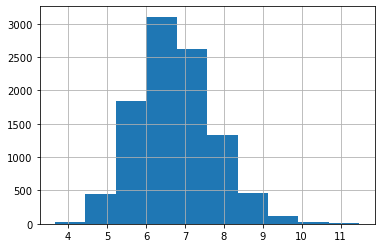

In [12]:
estimate_df['estimate'].hist()
plt.show()

Now here's a very important part that personally took me a long time to understand.
* The standard deviation of a population is called **Standard Deviation**.
* But the standard deviation of the means of the samples is called **Standard Error**.

So right now, let us calculate standard error.

In [13]:
standard_error = sampled_data['aqi'].std()/np.sqrt(50)
standard_error

0.7413225908290327

Let us visulaize using a histogram :
* The normally distribution of the means of the samples
* How off is the mean of 1 sample from the population mean.
* How off is the mean of means of 10,000 samples from the population mean.

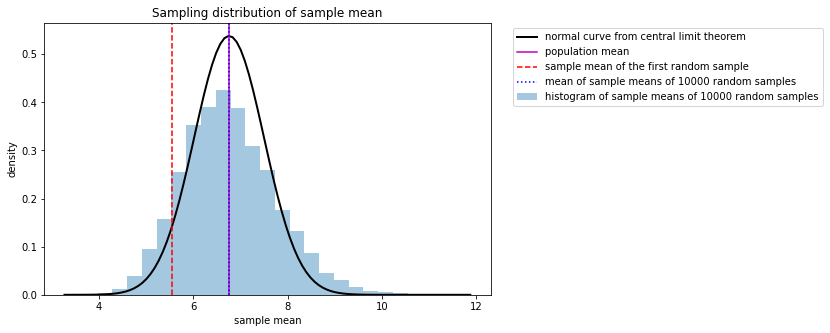

In [14]:
 ### YOUE CODE HERE ###
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

We can clearly see that Central Limit Theorem holds true in whatever it states.